# EDA


In [1]:
import pandas as pd 
import numpy as np 


df = pd.read_csv(r'D:\Vs code\datasets\carsdataset.csv')


In [2]:
df.head(1)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011


In [3]:
df.describe ()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [4]:
''' # Assuming df is your DataFrame
df.columns = df.columns.str.strip()

# Alternatively, you can use the rename method
df.rename(columns=lambda x: x.strip(), inplace=True)
'''
print(df.columns)


Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')


In [5]:
count_CarMOdels = df["model"].value_counts()
print(count_CarMOdels)

model
Golf                         1492
Corsa                        1491
Fiesta                       1289
Astra                        1191
Focus                         985
                             ... 
S60 Cross Country               1
John Cooper Works Clubman       1
323                             1
Rodius                          1
NV250                           1
Name: count, Length: 841, dtype: int64


In [6]:
# Drop rows with missing values and then count non-null values in each column
non_null_counts = df.dropna().count()

# Display the counts
print(non_null_counts)


mileage      46071
make         46071
model        46071
fuel         46071
gear         46071
offerType    46071
price        46071
hp           46071
year         46071
dtype: int64


In [7]:
df.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

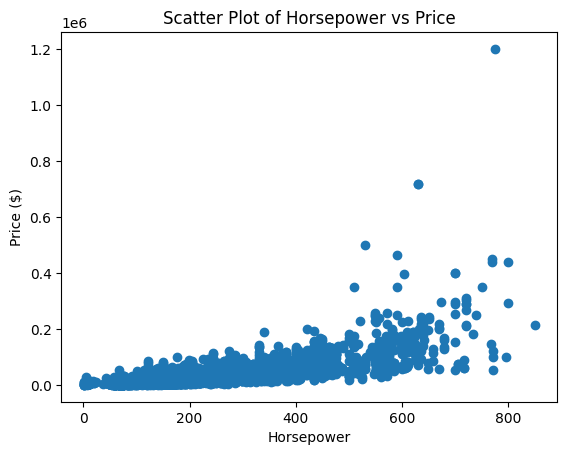

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot using seaborn
plt.scatter(x='hp', y='price', data=df)
plt.xlabel('Horsepower')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Horsepower vs Price')
plt.show()


# GroupBy in Python


In [9]:

df_test = df[['make', 'offerType', 'price']]
df_group = df_test.groupby(['make', 'offerType'], as_index=False).mean()


(0.0, 1260383.579154171)

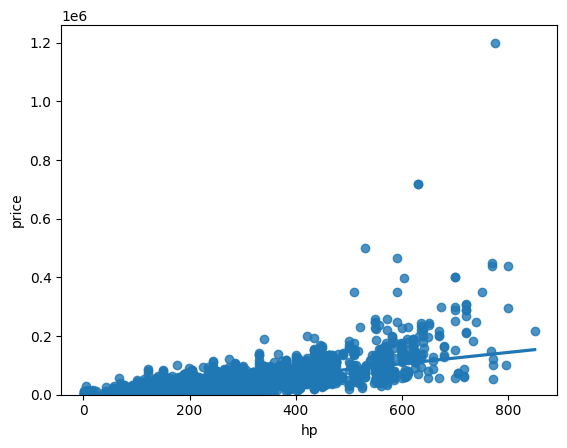

In [10]:
import seaborn as sns

sns.regplot(x = 'hp', y = 'price', data = df)

plt.ylim(0,)

(0.0, 4250.441187056061)

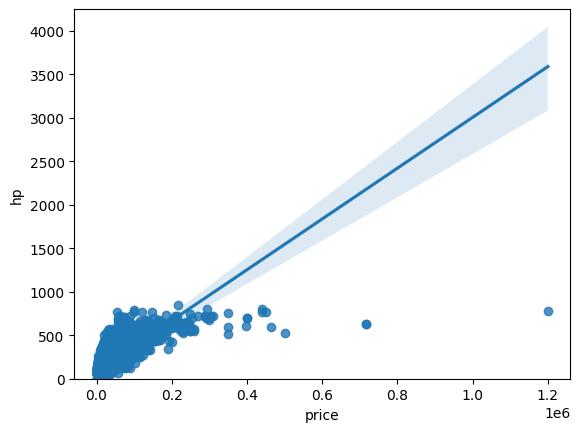

In [11]:
import seaborn as sns

sns.regplot(x = 'price', y = 'hp', data = df)

plt.ylim(0,)

In [12]:
df_test = df[['make', 'offerType', 'price']]
df_group = df_test.groupby(['make', 'offerType'], as_index=False).mean()


In [13]:
import numpy as np
import scipy.stats

# Drop NaN or infinite values from 'hp' and 'price' columns
cleaned_df = df.dropna(subset=['hp', 'price']).replace([np.inf, -np.inf], np.nan).dropna(subset=['hp', 'price'])

# Calculate Pearson correlation coefficient
correlation, p_value = scipy.stats.pearsonr(cleaned_df['hp'], cleaned_df['price'])
print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)


Pearson correlation coefficient: 0.747617231710937
P-value: 0.0


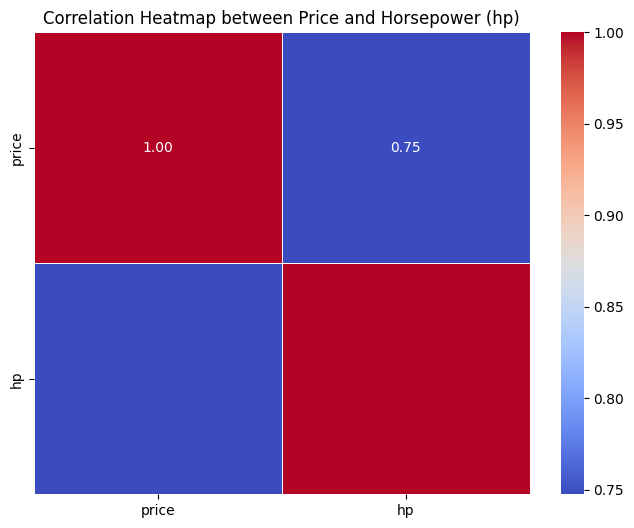

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
subset_df = df[['price', 'hp']]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Price and Horsepower (hp)')
plt.show()


In [15]:
print(df.columns)

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')


In [16]:
df.dropna(inplace= True)
df.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

# Model Evaluation using Visualization

In [17]:
# fitting a linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

x = df[['hp','mileage','year']]
y = df['price']

In [18]:
lm.fit(x,y)

LinearRegression()

In [19]:
y_hat = lm.predict(x)

In [20]:
# Assuming lm is your linear regression model
input_data = [[200, 235000,2011]]  # Replace with your actual input data
predicted_value = lm.predict(input_data)
print(predicted_value)


[14686.63726522]


c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(0.0, 1260388.7353654373)

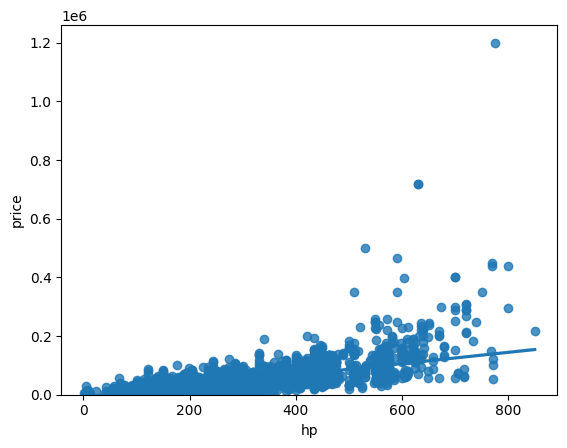

In [21]:
import seaborn as sns
sns.regplot(x = 'hp', y = 'price', data = df)
plt.ylim(0,)

(0.0, 1117468.8144468362)

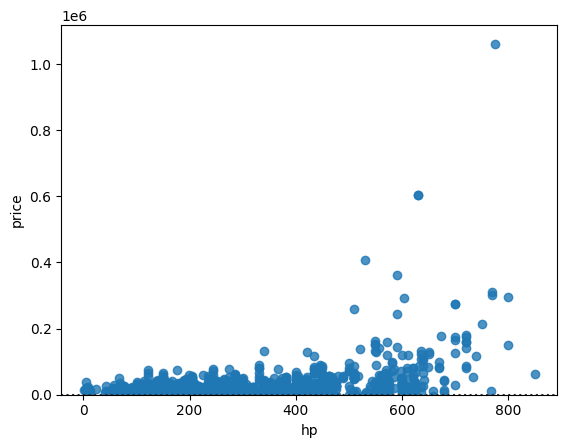

In [22]:
import seaborn as sns
sns.residplot(x = 'hp', y = 'price', data = df)
plt.ylim(0,)

# Polynomial Regression and Pipelines

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder


input = [('scale', StandardScaler()), ('Polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
pipe = Pipeline(input)

# Fit the pipeline on the specified features and target
pipe.fit(df[['hp', 'mileage']], df['price'])

# Separate features and target variable for testing
X_test = df[['hp', 'mileage']]
y_test = df['price']




predictions = pipe.predict(X_test)
predictions




array([ 5165.90311867, 11237.35820817,  9644.60514413, ...,
       11520.89356694, 11520.89356694, 11520.89356694])

In [24]:
# Evaluate the performance using the score method (for regression, it's R-squared)
r_squared = pipe.score(X_test, y_test)

print("R-squared:", r_squared)
print("Predictions:", predictions)

R-squared: 0.7245162584180977
Predictions: [ 5165.90311867 11237.35820817  9644.60514413 ... 11520.89356694
 11520.89356694 11520.89356694]


In [25]:
pipe.predict(np.array([116,235000]).reshape(1,-1))

c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5165.90311867])

# visualize

c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


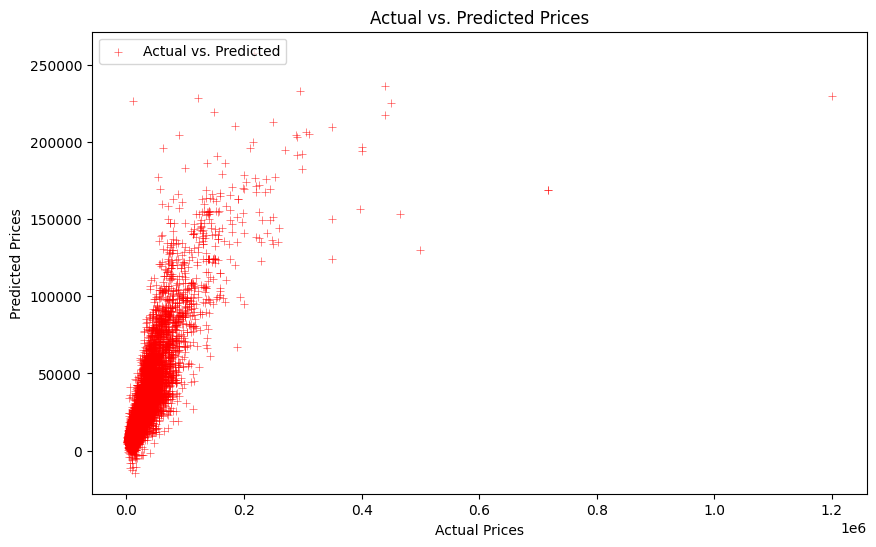

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Scatter plot for visualization with different colors and shapes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.7, color='red', marker='+', label='Actual vs. Predicted')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Add legend
plt.legend(loc='upper left')

plt.show()


c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jamshaid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

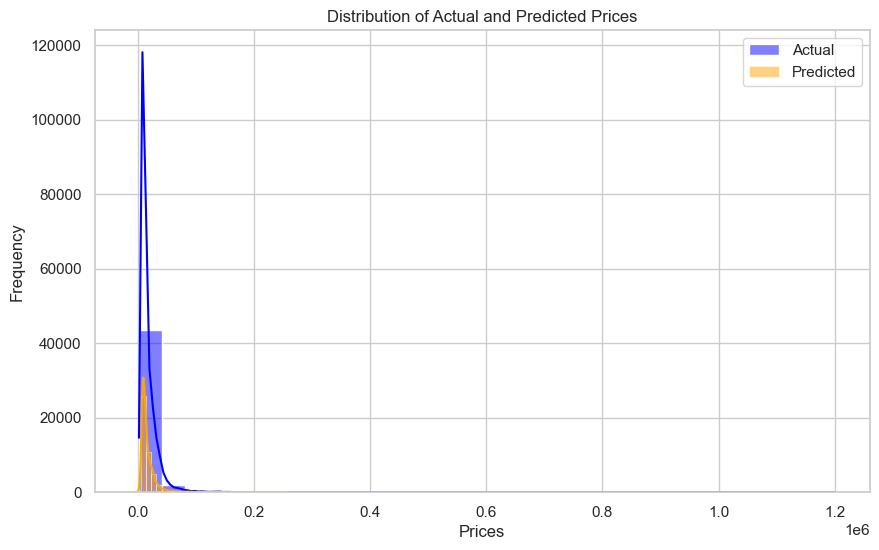

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'Actual' and 'Predicted' columns in your 'results' DataFrame
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))

# Create distribution plots for 'Actual' and 'Predicted'
sns.histplot(results['Actual'], kde=True, color='blue', label='Actual', bins=30)
sns.histplot(results['Predicted'], kde=True, color='orange', label='Predicted', bins=30)

plt.title('Distribution of Actual and Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')

# Add legend
plt.legend()

plt.show()


In [31]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge(alpha=0.1)

Ridge_model.fit(x,y)

y_hat = Ridge_model.predict(x)


from sklearn.metrics import mean_squared_error


# Calculate Mean Squared Error (MSE) as an evaluation metric
mse = mean_squared_error(y, y_hat)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 127629694.93842348


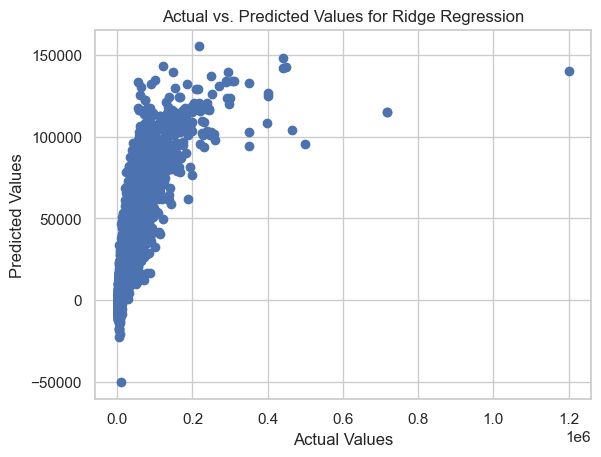

In [38]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y, y_hat)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Ridge Regression")
plt.show()
